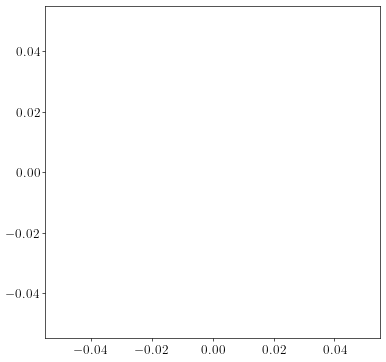

In [1]:
import numpy as np
from utils import CobbDouglasConsumer
from matplotlib import pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.plot()

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)


In [2]:
I = 3000
beta = 3000/(3*4)
p = np.sqrt(I/(3*beta))
h = I/(3*p)
print(I, beta, p, h)

3000 250.0 2.0 500.0


In [3]:
c = I - p*h
U = c**(2/3) * h**(1/3)
profit = p*h - (1/(2*beta))*h**2
TS = U + profit

params = {'nx':2,'dx':3,'ny':1,'dy':3,'I':I,'px':1,'py':p,'gmax':300}
prob = CobbDouglasConsumer(params)

assert prob.sol['y']==h
assert prob.sol['U']==U

peq = p
Ueq = U
Profiteq = profit
TSeq = TS

In [4]:
Profiteq

500.0

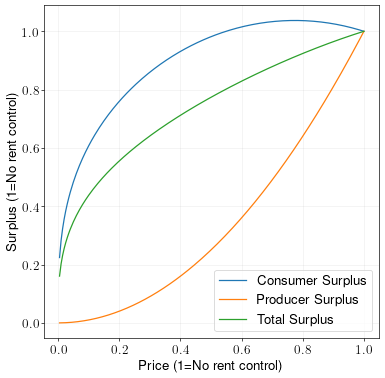

In [5]:
Us = []
Profits = []
TSs = []
ps = []
for p in np.arange(0.01, peq +0.01, 0.01):
    ps.append(p/peq)
    hd = I/(3*p)
    hs = beta*p
    h = np.minimum(hd,hs)
    c = I - p*h
    U = c**(2/3) * h**(1/3)
    Us.append(U/Ueq)
    Profit = p*h - (1/(2*beta))*h**2
    Profits.append(Profit/Profiteq)
    TS = Profit + U
    TSs.append(TS/TSeq)

plt.plot(ps, Us)
plt.plot(ps, Profits)
plt.plot(ps, TSs)
plt.grid(alpha=0.2)
plt.xlabel('Price (1=No rent control)')
plt.ylabel('Surplus (1=No rent control)')
plt.legend(['Consumer Surplus', 'Producer Surplus', 'Total Surplus'])
plt.show()
    